# U.S. Medical Insurance Costs

**See TL:DR at the end.**

The dataset contains information on the medical insurance costs of patients in different regions of the U.S.

#### Goal: To gain insight on different attributes surrounding Medical Insurance Costs in the U.S.

#### First we want to get familiar with the dataset we are dealing with:

In [88]:
# Import the libraries that we will be using in this project:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
# Inspecting what data types are stored in the dataset:
df.dtypes.reset_index()

,index,0
0,age,int64
1,sex,object
2,bmi,float64
3,children,int64
4,smoker,object
5,region,object
6,charges,float64


In [90]:
# To know how many rows of data we are dealing with and how many columns:
df.shape

(1338, 7)

There are 1338 rows and 7 columns in this dataset.

Now it is worth noting that this dataset is already cleaned and there is no missing data. From here we can move on to the next step in sorting our data for what we want to gain insight on.

### We want to gain insight on the following:
1. Is there a significant difference in the average cost of insurance for smokers vs non-smokers?
2. Which regions have the highest/lowest average insurance cost?
3. Is there a correlation between age and insurance cost?
4. Compare the cost of insurance for smokers and non-smokers in each region.

### Building a Class for our analysis of the data:
We will begin this by organizing our columns from the dataset into seperate lists so that we can make use of these lists in the Class.

In [96]:
# Create lists for each column in the dataset, we will add the values from the dataset into lists:
ages = []
sexes = []
bmis = []
children_count = []
smokers = []
regions = []
costs = []

# Organize the values from the csv into seperate lists of their corresponding columns:
def list_organizer(column_list, column_name):
    with open('insurance.csv', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            column_list.append(row[column_name])

list_organizer(ages, 'age')
list_organizer(sexes, 'sex')
list_organizer(bmis, 'bmi')
list_organizer(children_count, 'children')
list_organizer(smokers, 'smoker')
list_organizer(regions, 'region')
list_organizer(costs, 'charges')

Now the above lists are organized using a function.

We will now make a Class to analyze the insights that we want to look at.
## The Class will contain 4 methods:
* smokers_cost_avg() - shows average cost of smokers vs non-smokers.
* region_cost_avg() - shows average cost in each region.
* age_to_cost() - shows a scatter plot of the ages of non-smokers without children vs cost.
* region_smokers_bar() - shows a side by side bar graph of average cost of smokers vs non-smokers in each region.


In [118]:
class analyze:
    # Constructor used to define variables for our lists previously made:
    def __init__(self, age, sex, bmi, children, smoker, region, cost):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.cost = cost
        
    # This method is used to find the average insurance cost of smokers and non-smokers:
    def smokers_cost_avg(self):
        y = 0
        n = 0
        total_yes = 0
        total_no = 0
        
        # iterates through each row of lists so we can go through more than 1 column in the same row.
        # whilst iterating through each row, we want to add the costs of smokers/non-smokers and get their average.
        for x in range(len(self.cost)):
            if self.smoker[x] == 'yes':
                total_yes += float(self.cost[x])
                y += 1
            else:
                total_no += float(self.cost[x])
                n += 1
                
        avg_yes = round(total_yes / y, 2)
        avg_no = round(total_no / n, 2)
        
        print("Average cost for smokers: {}".format(avg_yes))
        print("Average cost for non-smokers: {}".format(avg_no))
    
    # This method is used to find the average insurance cost of each geographical location:
    def region_cost_avg(self):
        NE = 0
        NW = 0
        SE = 0
        SW = 0
        cost_NE = 0
        cost_NW = 0
        cost_SE = 0
        cost_SW = 0
        
        # iterates through each row of the region list, and from each row it checks what region it is and adds
        # the cost for that region into a total for that region which can then be used to check for an average later on:
        for x in range(len(self.region)):
            if self.region[x] == 'northeast':
                cost_NE += float(self.cost[x])
                NE += 1
            if self.region[x] == 'northwest':
                cost_NW += float(self.cost[x])
                NW += 1
            if self.region[x] == 'southeast':
                cost_SE += float(self.cost[x])
                SE += 1
            if self.region[x] == 'southwest':
                cost_SW += float(self.cost[x])
                SW += 1
        
        self.avg_cost_NE = round(cost_NE / NE, 2)
        self.avg_cost_NW = round(cost_NW / NW, 2)
        self.avg_cost_SE = round(cost_SE / SE, 2)
        self.avg_cost_SW = round(cost_SW / SW, 2)
        
        print("Northeast count: {} \nNorthwest count: {} \nSoutheast count: {} \nSouthwest count: {}".format(NE, NW, SE, SW))
        print("Northeast average cost: {} \nNorthwest average cost: {} \nSoutheast average cost: {} \nSouthwest average cost: {}".format(self.avg_cost_NE, self.avg_cost_NW, self.avg_cost_SE, self.avg_cost_SW))
        
    # This method is used to find the ages of non-smokers without children and show a scatterplot between their ages
    # and corresponding cost:
    def age_to_cost(self):
        
        age_no_children = []
        costs_no_children = []
        
        # iterating through the age list to find all the ages of people without any children:
        for x in range(len(self.age)):
            if int(self.children[x]) == 0 and self.smoker[x] == 'no':
                age_no_children.append(int(self.age[x]))
                costs_no_children.append(float(self.cost[x]))        
        
        # plotting the scatterplot here:
        plt.figure(figsize=(8, 6))
    
        plt.scatter(age_no_children, costs_no_children, c='blue', marker='.')
        plt.xlabel('Age of Person', fontsize=12)
        plt.ylabel('Insurance Cost', fontsize=12)
        
        plt.show()
    
    # This method is used to plot a side by side bar graph of average cost for smokers and non-smokers in each region:
    def region_smokers_bar(self):
        
        # dictionary to store our smokers ('yes') and non-smokers ('no') for each region:
        region_smokers = {'NE': {'yes': [], 'no': []}, 
                          'NW': {'yes': [], 'no': []}, 
                          'SE': {'yes': [], 'no': []}, 
                          'SW': {'yes': [], 'no': []}}
        
        for x in range(len(self.cost)):
            if self.region[x] == 'northeast' and self.smoker[x] == 'yes':
                region_smokers['NE']['yes'].append(float(self.cost[x]))
            if self.region[x] == 'northeast' and self.smoker[x] == 'no':
                region_smokers['NE']['no'].append(float(self.cost[x]))
            
            if self.region[x] == 'northwest' and self.smoker[x] == 'yes':
                region_smokers['NW']['yes'].append(float(self.cost[x]))
            if self.region[x] == 'northwest' and self.smoker[x] == 'no':
                region_smokers['NW']['no'].append(float(self.cost[x]))
            
            if self.region[x] == 'southeast' and self.smoker[x] == 'yes':
                region_smokers['SE']['yes'].append(float(self.cost[x]))
            if self.region[x] == 'southeast' and self.smoker[x] == 'no':
                region_smokers['SE']['no'].append(float(self.cost[x]))
            
            if self.region[x] == 'southwest' and self.smoker[x] == 'yes':
                region_smokers['SW']['yes'].append(float(self.cost[x]))
            if self.region[x] == 'southwest' and self.smoker[x] == 'no':
                region_smokers['SW']['no'].append(float(self.cost[x]))
                
        # dictionary to store the average of costs for each value from the 'region_smokers' dictionary:
        region_smoker_avg = {'NE_avg': {'yes': 0, 'no': 0}, 
                             'NW_avg': {'yes': 0, 'no': 0}, 
                             'SE_avg': {'yes': 0, 'no': 0}, 
                             'SW_avg': {'yes': 0, 'no': 0}}
        
        region_smoker_avg['NE_avg']['yes'] += np.mean(region_smokers['NE']['yes'])
        region_smoker_avg['NE_avg']['no'] += np.mean(region_smokers['NE']['no'])
        region_smoker_avg['NW_avg']['yes'] += np.mean(region_smokers['NW']['yes'])
        region_smoker_avg['NW_avg']['no'] += np.mean(region_smokers['NW']['no'])
        region_smoker_avg['SE_avg']['yes'] += np.mean(region_smokers['SE']['yes'])
        region_smoker_avg['SE_avg']['no'] += np.mean(region_smokers['SE']['no'])
        region_smoker_avg['SW_avg']['yes'] += np.mean(region_smokers['SW']['yes'])
        region_smoker_avg['SW_avg']['no'] += np.mean(region_smokers['SW']['no'])
        
        yes_values = [region_smoker_avg[x]['yes'] for x in region_smoker_avg]
        no_values = [region_smoker_avg[x]['no'] for x in region_smoker_avg]
        
        # a function to map the widths of each bar into a list so both bars can fit together in each x-axis tick:
        # 't' is the sets of data, 'w' is width of the bar, 'n' is order of the bars (which one on the left/right), 
        # 'd' is number of values in list.
        def create_x(t, w, n, d):
            return [t*x + w*n for x in range(d)]
        
        yes_values_x = create_x(2, 0.8, 1, 4)
        no_values_x = create_x(2, 0.8, 2, 4)
        
        plt.figure(figsize=(8, 6))
        ax = plt.subplot()
        plt.bar(yes_values_x, yes_values, color='lightblue')
        plt.bar(no_values_x, no_values, color='lightgreen')
        
        # to find the center of where both bars meet for the x-ticks, we use the following list comprehension:
        middle_ticks = [(x + y) / 2 for x,y in zip(yes_values_x, no_values_x)]
        
        ax.set_xticks(middle_ticks)
        ax.set_xticklabels(['Northeast', 'Northwest', 'Southeast', 'Southwest'])
        plt.xlabel('Regions', fontsize=14)
        plt.ylabel('Average Insurance Cost', fontsize=14)
        plt.legend(['Smokers', 'Non-smokers'], loc=2)
        
        plt.show()

Now that we have the data we want to analyze sorted in the Class. We can start going through the different insights.

First we will create a variable to store our Class in for easier access:

In [111]:
medical = analyze(ages, sexes, bmis, children_count, smokers, regions, costs)

### 1. Is there a significant difference in the average cost of insurance for smokers vs non-smokers?

In [112]:
medical.smokers_cost_avg()

Average cost for smokers: 32050.23
Average cost for non-smokers: 8434.27


The average insurance cost for non-smokers is 8434.27 whilst for smokers is 32050.23. From this comparison we can see that there is a major discrepancy between the two categorical values and that smokers have a much higher average cost of insurance when compared with non-smokers.

### 2. Which region has the highest/lowest average insurance cost?

In [113]:
medical.region_cost_avg()

Northeast count: 324 
Northwest count: 325 
Southeast count: 364 
Southwest count: 325
Northeast average cost: 13406.38 
Northwest average cost: 12417.58 
Southeast average cost: 14735.41 
Southwest average cost: 12346.94


First we see that there are 4 different regions. The difference in number of counts in northeast, northwest and southwest is negligible with only a small difference in southeast which has a higher count of 39.

We have the southwest region with the lowest insurance cost average of 12346.94 and southeast region with the highest insurance cost average of 14735.41.

### 3. Is there a correlation between age and insurance cost?
Since there are a many factors that can influence the above question, we narrowed down the factors influencing the cost by taking only ages that are non-smokers and that have no children. This will be shown using a scatter plot to see if there is any correlation between age and cost:

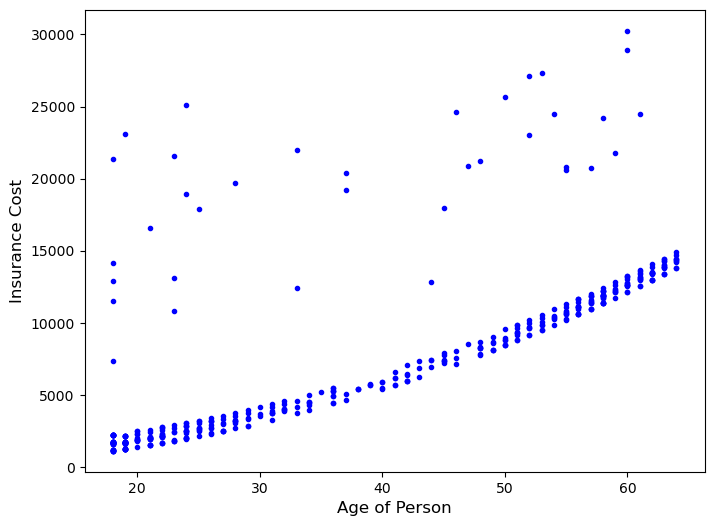

In [119]:
medical.age_to_cost()

Notice there are many outliers that lie well above the tighter band of dots at the lower portion of the plot, these could be due to other factors and makes it difficult to see any correlation from this analysis only. However, the tighter band of dots at the lower portion of the plot does have a positive correlation indicating that with an increase in age there will be an increase in insurance cost.

### 4. Compare the cost of insurance for smokers and non-smokers in each region.
For this comparison we will be using a side by side bar graph:

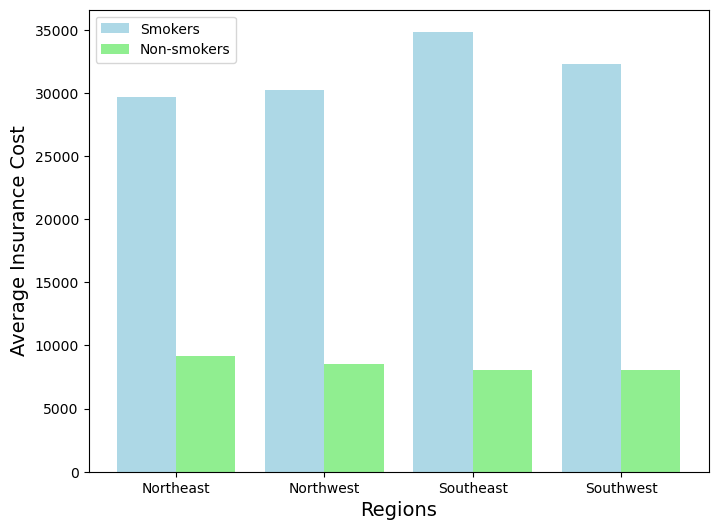

In [115]:
medical.region_smokers_bar()

As we have previously seen, the average insurance costs of smokers vs non-smokers had a major discrepancy and so we would not expect anything too different when looking at each region as they display similar features.

### TL:DR
The dataset for this project contained information about patients' medical insurance costs in the U.S.
The goal for the project was to gain insights into some of the factors behind the insurance costs, such as how the insurance costs for smokers vs non-smokers differ. In doing so, a few python libraries were used such as pandas, csv, numpy and matplotlib. The data was collected and stored in a class with methods that were called upon during analysis. A scatter plot and bar graph were used to visualize some insights.